# Pandas

Pandas é uma biblioteca opensource que oferece uma ferramenta de fácil uso e de alta performance para estruturar e analisar os dados em Python. A vantagem de estruturar os dados no Pandas é que, diferente do Array 2D do Numpy, ele pode armazenar dados de diferentes tipos.

Para importar o Pandas, basta executar o seguinte comando:

In [1]:
import pandas as pd
import numpy as np

## Series e DataFrame

O Series e o DataFrame são as duas principais estruturas de dados do Pandas. O Series é basicamente uma lista que contem os valores de uma coluna, enquanto o DataFrame é constituído por múltiplos Series e representa os dados na forma tabulada. O DataFrame ainda permite que as linhas e as colunas sejam rotuladas.

### Criando um DataFrame

Existem várias formas de você criar um Dataframe. Uma delas é fornecendo ao Pandas um dicionário em que as chaves correspondem ao nome da coluna e os valores uma lista onde cada elemento corresponde a um valor das linhas que compõem os dados.

In [2]:
name = ["hidrogen", "carbon", "nitrogen", "oxigen", "phosphorus", "sulfur"]
atomicNumber = [1, 6, 7, 8, 15, 16]
mass = [1.008, 12.011, 14.007, 15.999, 30.974, 32.065]

data = {}
data["name"] = name
data['atomicN'] = atomicNumber
data['mass'] = mass

dataF = pd.DataFrame(data)

dataF

,name,atomicN,mass
0,hidrogen,1,1.008
1,carbon,6,12.011
2,nitrogen,7,14.007
3,oxigen,8,15.999
4,phosphorus,15,30.974
5,sulfur,16,32.065


### Adicionando rótulos às linhas

Quando executamos a função <b>pd.DataFrame()</b>, veja que os rótulos das colunas correspondem às chaves e o rótulo das linhas correspondem aos inteiros de 0 a 6. Se você quiser colocar um outro rótulo, basta atribuir ao parâmetro <b>.index</b> do dataframe uma lista contendo os rótulos para cada linha como a seguir:

In [3]:
symbol = ["H", "C", "N", "O", "P", "S"]
dataF.index = symbol
print(dataF)

         name  atomicN    mass
H    hidrogen        1   1.008
C      carbon        6  12.011
N    nitrogen        7  14.007
O      oxigen        8  15.999
P  phosphorus       15  30.974
S      sulfur       16  32.065


### Exercício

Tome como base a tabela abaixo para construir um dataframe contendo os dados das notas das cinco primeiras marcas de notebook em relação ao "Review", "Tech Support", "Design" e "Innovation". Utilize os nomes das marcas como rótulo das linhas.



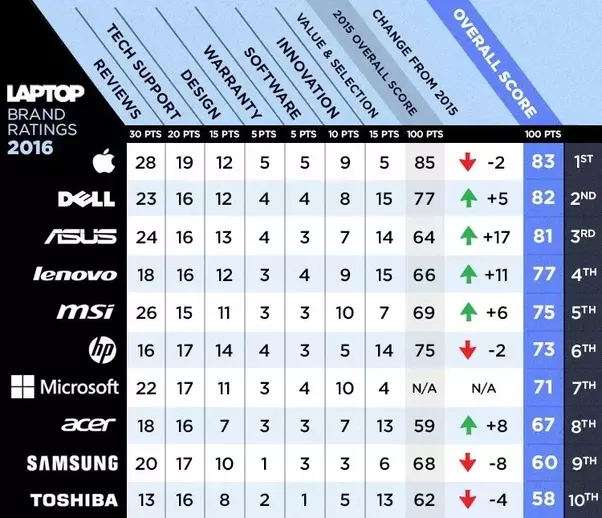

In [4]:
# Escreva o seu código aqui
marcas = ['apple','dell','asus','lenovo','msi']
review = [28,23,24,18,26]
techSup = [19,16,16,12,11]
design = [5,4,3,4,3]
innovation = [9,8,7,9,10]

notes = {}
notes["Review"]= review
notes['Tech Support'] = techSup
notes['Design'] = design
notes['Innovation'] = innovation

df = pd.DataFrame(notes)

df.index = marcas
print(df)

        Review  Tech Support  Design  Innovation
apple       28            19       5           9
dell        23            16       4           8
asus        24            16       3           7
lenovo      18            12       4           9
msi         26            11       3          10


### Acessando os dados em uma DataFrame

O Pandas fornece várias formas de acessar os dados em uma DataFrame. A mais simples delas é utilizando os colchotes, como a seguir.

In [5]:
# acessando os valores de uma coluna na forma de series:
print(dataF["mass"])

# acessando os valores de uma coluna na forma de dataframe:
print(dataF[["atomicN"]])

H     1.008
C    12.011
N    14.007
O    15.999
P    30.974
S    32.065
Name: mass, dtype: float64
   atomicN
H        1
C        6
N        7
O        8
P       15
S       16


In [6]:
# acessando os valores de duas colunas na forma de dataframe:
print(dataF[["mass", "atomicN"]])

     mass  atomicN
H   1.008        1
C  12.011        6
N  14.007        7
O  15.999        8
P  30.974       15
S  32.065       16


In [7]:
# Obs.:
# Series de uma tabela pode ser acessada desta forma também:
print(dataF.mass)

H     1.008
C    12.011
N    14.007
O    15.999
P    30.974
S    32.065
Name: mass, dtype: float64


In [8]:
# acessando os valores das três primeiras linhas (utilizando o slice):
print(dataF[0:3])
print(dataF[:3])

       name  atomicN    mass
H  hidrogen        1   1.008
C    carbon        6  12.011
N  nitrogen        7  14.007
       name  atomicN    mass
H  hidrogen        1   1.008
C    carbon        6  12.011
N  nitrogen        7  14.007


In [9]:
print(dataF["H":"N"])
print(dataF[:"N"])

       name  atomicN    mass
H  hidrogen        1   1.008
C    carbon        6  12.011
N  nitrogen        7  14.007
       name  atomicN    mass
H  hidrogen        1   1.008
C    carbon        6  12.011
N  nitrogen        7  14.007


In [10]:
# o que este comando está fazendo?
dataF[::-1]

,name,atomicN,mass
S,sulfur,16,32.065
P,phosphorus,15,30.974
O,oxigen,8,15.999
N,nitrogen,7,14.007
C,carbon,6,12.011
H,hidrogen,1,1.008


In [11]:
# o que este comando está fazendo?
dataF[::2]

,name,atomicN,mass
H,hidrogen,1,1.008
N,nitrogen,7,14.007
P,phosphorus,15,30.974


In [12]:
# o que este comando está fazendo?
dataF[1:5:2]

,name,atomicN,mass
C,carbon,6,12.011
O,oxigen,8,15.999


In [13]:
# acessando linhas e colunas
print(dataF[["mass", "atomicN"]][1:])
print(dataF[1:][["mass", "atomicN"]])

     mass  atomicN
C  12.011        6
N  14.007        7
O  15.999        8
P  30.974       15
S  32.065       16
     mass  atomicN
C  12.011        6
N  14.007        7
O  15.999        8
P  30.974       15
S  32.065       16


In [14]:
dataF[["mass", "atomicN"]]["C":]

,mass,atomicN
C,12.011,6
N,14.007,7
O,15.999,8
P,30.974,15
S,32.065,16


Além dos colchetes, o Pandas oferece duas outras funções que podem facilitar o acesso aos dados. Estes são o <b>loc()</b> e o <b>iloc()</b>. Veja como cada um funciona abaixo:

In [15]:
# acessando os valores da linha com os dados de hidrogênio utilizando o loc (na forma de series):
print(dataF.loc["H"])

print()

# acessando os valores da linha com os dados de hidrogênio utilizando o loc (na forma de dataframe):
print(dataF.loc[["H"]])

name       hidrogen
atomicN           1
mass          1.008
Name: H, dtype: object

       name  atomicN   mass
H  hidrogen        1  1.008


In [16]:
# acessando os valores da linha com os dados de hidrogênio utilizando o iloc (na forma de series):
print(dataF.iloc[0])


# acessando os valores da linha com os dados de hidrogênio utilizando o iloc (na forma de dataframe):
print(dataF.iloc[[0]])

name       hidrogen
atomicN           1
mass          1.008
Name: H, dtype: object
       name  atomicN   mass
H  hidrogen        1  1.008


In [17]:
# acessando mais de uma linha utilizando o loc:
print(dataF.loc[["C","H"]])

print()

# acessando mais de uma linha utilizando o iloc:
print(dataF.iloc[[1,0]])

       name  atomicN    mass
C    carbon        6  12.011
H  hidrogen        1   1.008

       name  atomicN    mass
C    carbon        6  12.011
H  hidrogen        1   1.008


In [18]:
# acessando apenas as colunas mass e atomicN
print(dataF.loc[:,["mass","atomicN"]])
print(dataF.loc[:,"atomicN":])

print()

print(dataF.iloc[:,[2,1]])
print(dataF.iloc[:,1:])

     mass  atomicN
H   1.008        1
C  12.011        6
N  14.007        7
O  15.999        8
P  30.974       15
S  32.065       16
   atomicN    mass
H        1   1.008
C        6  12.011
N        7  14.007
O        8  15.999
P       15  30.974
S       16  32.065

     mass  atomicN
H   1.008        1
C  12.011        6
N  14.007        7
O  15.999        8
P  30.974       15
S  32.065       16
   atomicN    mass
H        1   1.008
C        6  12.011
N        7  14.007
O        8  15.999
P       15  30.974
S       16  32.065


## Carregando um arquivo CSV no Pandas

O Pandas possui uma função chamada <b>pd.read_csv</b> que carrega um arquivo CSV e o coloca em uma estrutura de DataFrame. Segue um link contendo a documentação desta função: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Segue abaixo um exemplo de como carregar um arquivo CSV pelo Pandas:

In [19]:
!gdown https://drive.google.com/uc?id=1lt-kMg7y8xT7Z9I6d-56Azw5IhWvqFCJ

Downloading...
From: https://drive.google.com/uc?id=1lt-kMg7y8xT7Z9I6d-56Azw5IhWvqFCJ
To: /content/teste.csv
100% 397/397 [00:00<00:00, 1.54MB/s]


In [20]:
teste = pd.read_csv('teste.csv')
teste

,Locus,Motif,Repeats,Start,End
0,Agig00001,TG,15,4256,4285
1,Agig00003,AT,16,88398,88429
2,Agig00004,TA,13,194936,194961
3,Agig00005,AT,19,213498,213535
4,Agig00006,AG,16,213536,213567
5,Agig00008,CT,11,218445,218466
6,Agig00009,TG,13,241556,241581
7,Agig00010,TG,13,243863,243888
8,Agig00012,TG,20,266766,266805
9,Agig00013,TG,13,270437,270462


Nesta tabela, a primeira coluna é um identificador único de cada linha e podemos utilizá-lo para rotular as linhas. Para que o Pandas considere isso, acrescente o parâmetro index_col indicando a coluna a considerar como index.

In [21]:
teste = pd.read_csv('teste.csv', index_col = 0)
teste

,Motif,Repeats,Start,End
Locus,,,,
Agig00001,TG,15,4256,4285
Agig00003,AT,16,88398,88429
Agig00004,TA,13,194936,194961
Agig00005,AT,19,213498,213535
Agig00006,AG,16,213536,213567
Agig00008,CT,11,218445,218466
Agig00009,TG,13,241556,241581
Agig00010,TG,13,243863,243888
Agig00012,TG,20,266766,266805


### Exercício

Carregue o arquivo <b>[data.csv](https://drive.google.com/file/d/1IIy12gyacF6Z8TJy4y0dFyFmDcEAnOlV/view?usp=share_link)</b> utilizando o pd.read_csv(). Perceba duas coisas nestes dados:

- A segunda coluna do arquivo, o separador de milhares é um espaço. Caso o arquivo seja carregado desta forma, os valores desta coluna é considerada uma string. Veja na documentação do pd.read_csv() para ele considerar que o separador de milhares é um espaço.

- A segunda linha do arquivo é um cabeçalho e não uma observação. Veja na documentação como fazer para que o pd.read_csv() pule esta linha.

In [22]:
!gdown https://drive.google.com/uc?id=1IIy12gyacF6Z8TJy4y0dFyFmDcEAnOlV

Downloading...
From: https://drive.google.com/uc?id=1IIy12gyacF6Z8TJy4y0dFyFmDcEAnOlV
To: /content/data.csv
100% 7.89k/7.89k [00:00<00:00, 23.9MB/s]


In [23]:
# Escreva o seu código aqui

data = pd.read_csv('data.csv', thousands=" ",skiprows=[1])
data

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
0,Afghanistan,34656,43.9,4.1,4.6
1,Albania,2926,17.7,1.6,1.7
2,Algeria,40606,29.0,10.7,2.8
3,Andorra,77,14.8,0.1,NaN
4,Angola,28813,47.0,3.3,5.7
...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),31568,27.9,8.8,2.3
190,Viet Nam,94569,23.1,29.1,2.0
191,Yemen,27584,40.3,3.6,4.0
192,Zambia,16591,45.1,1.8,5.0


### Algumas funções úteis no Pandas:

Mais funções pode ser encontrado neste Cheat Sheet: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [24]:
# Mostrar as 5 primeiras linhas:
data.head()

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
0,Afghanistan,34656,43.9,4.1,4.6
1,Albania,2926,17.7,1.6,1.7
2,Algeria,40606,29.0,10.7,2.8
3,Andorra,77,14.8,0.1,NaN
4,Angola,28813,47.0,3.3,5.7


In [25]:
# Mostrar as 5 últimas linhas
data.tail()

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
189,Venezuela (Bolivarian Republic of),31568,27.9,8.8,2.3
190,Viet Nam,94569,23.1,29.1,2.0
191,Yemen,27584,40.3,3.6,4.0
192,Zambia,16591,45.1,1.8,5.0
193,Zimbabwe,16150,41.4,2.0,3.8


In [26]:
# Mostrar dez linhas aleatórias
data.sample(n = 10)

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
150,Saudi Arabia,32276,25.5,5.1,2.5
9,Austria,8712,14.1,6.2,1.5
50,Dominica,74,24.7,0.0,NaN
117,Myanmar,52885,27.4,14.0,2.2
71,Guinea,12396,42.5,1.8,4.9
143,Rwanda,11918,40.5,1.6,3.9
148,San Marino,33,13.6,0.0,NaN
90,Kiribati,114,34.8,0.0,3.7
102,Malawi,18092,44.3,2.2,4.6
62,France,64721,18.2,47.4,2.0


In [27]:
# Mostrar 5% de linhas aleatórias
data.sample(frac=0.05)

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
114,Montenegro,629,18.3,0.4,1.7
183,United Kingdom of Great Britain and Northern I...,65789,17.6,45.0,1.9
96,Lesotho,2204,35.5,0.4,3.1
81,Iraq,37203,40.5,5.4,4.4
112,Monaco,38,18.2,0.0,NaN
140,Republic of Moldova,4060,15.7,2.0,1.2
79,Indonesia,261115,27.7,62.9,2.4
41,Côte d'Ivoire,23696,42.6,3.3,4.9
19,Bhutan,798,26.9,0.2,2.1
12,Bahrain,1425,20.3,0.2,2.0


In [28]:
# Filtrar dados que satisfaça uma condição:
data[data["Population (in thousands) total"] >1000000]

,Unnamed: 0,Population (in thousands) total,Population proportion under 15 (%),Population proportion over 60 (%),Total fertility rate (per woman)
35,China,1411415,17.7,646.0,1.6
78,India,1324171,28.2,349.9,2.3


In [29]:
# Troca do nome das colunas:
data.columns = ['country','popT', 'pop15', 'pop60', 'fert']
data.head()

,country,popT,pop15,pop60,fert
0,Afghanistan,34656,43.9,4.1,4.6
1,Albania,2926,17.7,1.6,1.7
2,Algeria,40606,29.0,10.7,2.8
3,Andorra,77,14.8,0.1,NaN
4,Angola,28813,47.0,3.3,5.7


In [30]:
# Dados populacionais do Brasil:
data[data["country"] == "Brazil"]

,country,popT,pop15,pop60,fert
23,Brazil,207653,22.1,73.4,1.7


In [31]:
# População maior que 100 milhões:
data[data["popT"] > 100000]

,country,popT,pop15,pop60,fert
13,Bangladesh,162952,28.9,33.7,2.1
23,Brazil,207653,22.1,73.4,1.7
35,China,1411415,17.7,646.0,1.6
59,Ethiopia,102403,41.1,15.5,4.2
78,India,1324171,28.2,349.9,2.3
79,Indonesia,261115,27.7,62.9,2.4
86,Japan,127749,12.9,122.0,1.5
110,Mexico,127540,27.1,36.2,2.2
125,Nigeria,185990,44.1,24.0,5.5
129,Pakistan,193203,34.9,37.1,3.5


In [32]:
# Consulta em cadeia em uma tabela Pandas:
# População maior que 100 milhões e com a taxa de fertilidade maior que 3:
data[data["popT"] > 100000][data["fert"] > 3]

<ipython-input-32-33e561c05884>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["popT"] > 100000][data["fert"] > 3]


,country,popT,pop15,pop60,fert
59,Ethiopia,102403,41.1,15.5,4.2
125,Nigeria,185990,44.1,24.0,5.5
129,Pakistan,193203,34.9,37.1,3.5


In [33]:
# funções matemáticos:

# soma:
print("soma: %d" % data['popT'].sum())

# contagem:
print("contagem: %d" % data['popT'].count())

# média
print("média: %f" % data['popT'].mean())

# mediana
print("mediana: %f" % data['popT'].median())

# min
print("mínimo: %d" % data['popT'].min())

# max
print("máximo: %d" % data['popT'].max())

# quartil
print(data['popT'].quantile([0.25,0.5,0.75]))

# variância
print("variância: %f" % data['popT'].var())

# desvio padrão
print("desvio padrão: %f" % data['popT'].std())

soma: 7430261
contagem: 194
média: 38300.314433
mediana: 8557.000000
mínimo: 2
máximo: 1411415
0.25     1973.25
0.50     8557.00
0.75    28051.25
Name: popT, dtype: float64
variância: 20543303683.864346
desvio padrão: 143329.353881


## Exercícios

Considere o arquivo [CO2_emission.txt](https://drive.google.com/file/d/1FL491HmduZCDbTBPhIKHIvW2kLuqoiYJ/view?usp=share_link). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Elimine aqueles países que apresentam valores faltantes ("..") e responda:

Qual foi o país que menos emitiu CO2 ao longo destes anos?

In [34]:
!gdown https://drive.google.com/uc?id=1FL491HmduZCDbTBPhIKHIvW2kLuqoiYJ

Downloading...
From: https://drive.google.com/uc?id=1FL491HmduZCDbTBPhIKHIvW2kLuqoiYJ
To: /content/CO2_emission.txt
100% 40.1k/40.1k [00:00<00:00, 69.6MB/s]


In [35]:
# carregue o arquivo. Para isso, considere que:
#   o cabeçalho está na primeira linha
#   Que os rótulos das linhas sejam os valores da terceira coluna
#   Que os valores faltantes sejam identificados como ".."

df = pd.read_csv('CO2_emission.txt',sep ="\t" ,index_col=3,)
#df.fillna("..")
df.head()

,Series Name,Series Code,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
Country Code,,,,,,,,,,,,,,,,,,
AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,Afghanistan,773.737,817.741,1070.764,1195.442,949.753,1327.454,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,Albania,3021.608,3223.293,3751.341,4294.057,4165.712,4253.72,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,Algeria,87861.32,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.5,121187.016,129987.816,134465.223,145400.217
ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
AND,CO2 emissions (kt),EN.ATM.CO2E.KT,Andorra,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.71,462.042


In [36]:
# selecione apenas as colunas correspondente aos anos
anos = df.iloc[:, 3:]
#anos[anos[:].str.contains("..") == False]
anos

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
Country Code,,,,,,,,,,,,,,,
AFG,773.737,817.741,1070.764,1195.442,949.753,1327.454,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
ALB,3021.608,3223.293,3751.341,4294.057,4165.712,4253.72,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
DZA,87861.32,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.5,121187.016,129987.816,134465.223,145400.217
ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
AND,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.71,462.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# elimine qualquer linha que tenha dados faltantes
df.replace("..", np.nan, inplace=True)
df.dropna(how='any',inplace=True)
df = df[:-2]
df

,Series Name,Series Code,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
Country Code,,,,,,,,,,,,,,,,,,
AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,Afghanistan,773.737,817.741,1070.764,1195.442,949.753,1327.454,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,Albania,3021.608,3223.293,3751.341,4294.057,4165.712,4253.72,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,Algeria,87861.32,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.5,121187.016,129987.816,134465.223,145400.217
AND,CO2 emissions (kt),EN.ATM.CO2E.KT,Andorra,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.71,462.042
AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,Angola,9541.534,9732.218,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,"Yemen, Rep.",14642.331,16208.14,15764.433,17304.573,18881.383,20043.822,21316.271,20971.573,22339.364,24561.566,23432.13,19666.121,18668.697,25496.651,22698.73
URY,CO2 emissions (kt),EN.ATM.CO2E.KT,Uruguay,5306.149,5089.796,4620.42,4598.418,5610.51,5775.525,6648.271,6002.879,8265.418,8060.066,6387.914,7763.039,8694.457,7587.023,6747.28
VEN,CO2 emissions (kt),EN.ATM.CO2E.KT,"Venezuela, RB",152422.522,172587.355,193316.906,192103.129,151733.126,165095.674,169514.409,160786.949,179114.615,179789.343,189070.52,176822.74,198766.068,183922.052,185220.17


In [38]:
df.iloc[:, 4:] = df.iloc[:, 4:].astype(float)

<ipython-input-38-21a9e323f373>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 4:] = df.iloc[:, 4:].astype(float)


In [39]:
# crie uma coluna "sum" que contenha a soma das emissões de carbono ao longo dos anos
df['sum'] = df.iloc[:, 4:].sum(axis=1)
df

<ipython-input-39-068883a99877>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum'] = df.iloc[:, 4:].sum(axis=1)


,Series Name,Series Code,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum
Country Code,,,,,,,,,,,,,,,,,,,
AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,Afghanistan,773.737,817.741,1070.764,1195.442,949.753,1327.454,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225,71543.170
ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,Albania,3021.608,3223.293,3751.341,4294.057,4165.712,4253.72,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853,61796.284
DZA,CO2 emissions (kt),EN.ATM.CO2E.KT,Algeria,87861.32,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.5,121187.016,129987.816,134465.223,145400.217,1553792.241
AND,CO2 emissions (kt),EN.ATM.CO2E.KT,Andorra,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.71,462.042,7304.664
AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,Angola,9541.534,9732.218,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.16,330510.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,"Yemen, Rep.",14642.331,16208.14,15764.433,17304.573,18881.383,20043.822,21316.271,20971.573,22339.364,24561.566,23432.13,19666.121,18668.697,25496.651,22698.73,287353.454
URY,CO2 emissions (kt),EN.ATM.CO2E.KT,Uruguay,5306.149,5089.796,4620.42,4598.418,5610.51,5775.525,6648.271,6002.879,8265.418,8060.066,6387.914,7763.039,8694.457,7587.023,6747.28,91851.016
VEN,CO2 emissions (kt),EN.ATM.CO2E.KT,"Venezuela, RB",152422.522,172587.355,193316.906,192103.129,151733.126,165095.674,169514.409,160786.949,179114.615,179789.343,189070.52,176822.74,198766.068,183922.052,185220.17,2497843.056


In [40]:
# ordene os dados pela soma de forma crescente e imprima a primeira linha
df_ordenado = df.sort_values(by=['sum'])

In [41]:
df_ordenado.head(1)

,Series Name,Series Code,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum
Country Code,,,,,,,,,,,,,,,,,,,
TUV,CO2 emissions (kt),EN.ATM.CO2E.KT,Tuvalu,7.334,7.334,11.001,11.001,11.001,11.001,7.334,11.001,11.001,11.001,7.334,7.334,11.001,11.001,11.001,139.346


Qual foi o ano que mais foi emitido CO2?

In [42]:
df_ordenado = df.sort_values(by=['sum'],ascending=False)
df_ordenado.index = range(1, len(df_ordenado)+1)
df_ordenado.iloc[[0]]

,Series Name,Series Code,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],sum
1,CO2 emissions (kt),EN.ATM.CO2E.KT,China,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,7030797.772,7553070.247,8001008.965,8776040.416,9733538.12,10028573.939,10258007.128,10291926.878,1.012110e+08


Qual posição o Brasil ocupa no rank dos países que mais emitiram CO2 ao longo destes anos?

In [43]:
brasil = df_ordenado.index[df_ordenado['Country Name'] == 'Brazil'].tolist()
print(brasil)

[16]
